In [79]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ydc.tools import import_data, distances
from ydc.tools.supercats import add_supercats
from simplekml import Kml, Style
from colorsys import hsv_to_rgb
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

In [2]:
businesses = import_data.import_businesses(status=True)
# reviews = import_data.import_reviews(status=True)

Successfully imported businesses with columns ['attributes' 'business_id' 'categories' 'city' 'full_address' 'hours'
 'latitude' 'longitude' 'name' 'neighborhoods' 'open' 'review_count'
 'stars' 'state' 'type']


In [102]:
(supercats_frame, names) = add_supercats(businesses)

In [124]:
super_cat_analysis = {}
sub_cat_analysis = {}
for super_cat in names.keys():
    this_super_cat = supercats_frame[supercats_frame['super_category'] == super_cat]
    super_cat_name = names[super_cat]['name']
    super_cat_analysis[super_cat_name] = {'mean': this_super_cat['stars'].mean(),
                                    'std': this_super_cat['stars'].std(),
                                    'var': this_super_cat['stars'].var(),
                                    'median': this_super_cat['stars'].median(),
                                    'count': this_super_cat['stars'].count(),
                                    'super_cat': super_cat}
    for sub_cat in names[super_cat]['sub_categories'].keys():
        this_sub_cat = this_super_cat[this_super_cat['sub_category'] == sub_cat]
        sub_cat_name = super_cat_name + "/" + names[super_cat]['sub_categories'][sub_cat]['name']
        sub_cat_analysis[sub_cat_name] = {'mean': this_sub_cat['stars'].mean(),
                                      'std': this_sub_cat['stars'].std(),
                                      'var': this_sub_cat['stars'].var(),
                                      'median': this_sub_cat['stars'].median(),
                                      'count': this_sub_cat['stars'].count(),
                                      'review_count': this_sub_cat['review_count'].sum(),
                                      'super_cat': super_cat,
                                      'sub_cat': sub_cat}

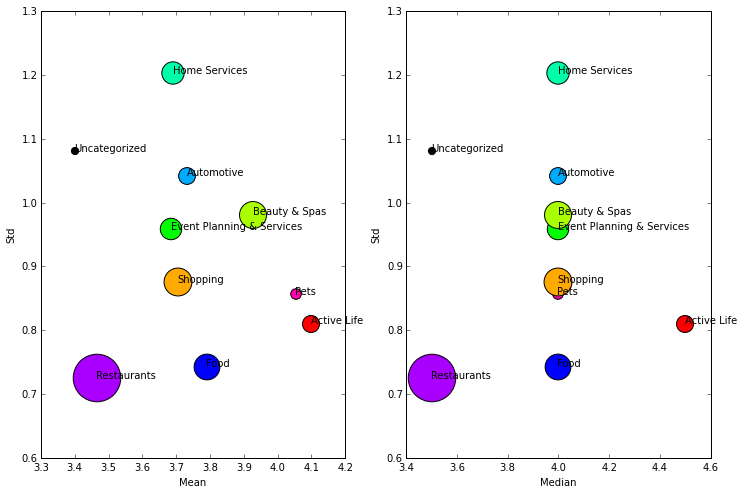

In [82]:
def get_color(super_cat, num=9):
    """ convert an supercat-integer  to (0.3, 0.2, 0.4)"""
    if super_cat==-1:
        return (0, 0, 0)
    rgb = hsv_to_rgb(super_cat/num, 1, 1)
    return (float(rgb[0]), float(rgb[1]), float(rgb[2]))
plt.subplot(121)
for cat, values in super_cat_analysis.items():
    plt.scatter(values['mean'], values['std'], c=get_color(values['super_cat']), s=values['count']/10)
    plt.text(values['mean'], values['std'], cat)
plt.xlabel('Mean')
plt.ylabel('Std')

plt.subplot(122)
for cat, values in super_cat_analysis.items():
    plt.scatter(values['median'], values['std'], c=get_color(values['super_cat']), s=values['count']/10)
    plt.text(values['median'], values['std'], cat)
plt.xlabel('Median')
plt.ylabel('Std')
plt.show()

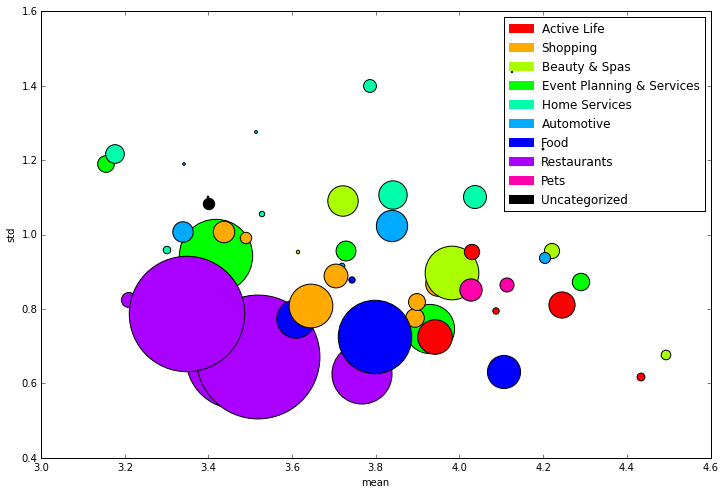

In [131]:
data = ['mean', 'std']

for cat, values in sub_cat_analysis.items():
    #if cat.find('Shopping'): 
    #    continue
    plt.scatter(values[data[0]], values[data[1]], c=get_color(values['super_cat']), s=values['review_count']/20)
    #plt.text(values[data[0]], values[data[1]], cat)
    
legend = []
for cat, value in names.items():
    legend.append(mpatches.Patch(color=get_color(cat), label=value['name']))
plt.legend(handles=legend)
plt.xlabel(data[0])
plt.ylabel(data[1])
plt.show()

In [67]:
super_analysis = pd.DataFrame(super_cat_analysis).transpose()
sub_analysis = pd.DataFrame(sub_cat_analysis).transpose()

In [68]:
sub_analysis.sort('mean', ascending=False)[:10]

,count,mean,median,std,sub_cat,super_cat,var
Beauty & Spas/Tattoo,140,4.492857,4.50,0.675857,3,2,0.456783
Active Life/Religious Organizations,158,4.433544,4.50,0.615884,3,0,0.379313
Event Planning & Services/Party & Event Planning,537,4.291434,4.50,0.873149,1,3,0.762389
Active Life/Fitness & Instruction,1062,4.245763,4.50,0.810718,0,0,0.657263
Beauty & Spas/Dentists,663,4.221719,4.50,0.956301,1,2,0.914512
Automotive/Auto Glass Services,241,4.203320,4.50,0.936610,3,5,0.877239
Event Planning & Services/Uncategorized,10,4.200000,4.50,1.229273,-1,3,1.511111
Pets/Uncategorized,4,4.125000,4.75,1.436141,-1,8,2.062500
Pets/Veterinarians,338,4.112426,4.50,0.863414,1,8,0.745483
Food/Specialty Food,887,4.106539,4.00,0.630026,2,6,0.396932


In [95]:
businesses['price'] = businesses.attributes.apply(lambda row: row.get('Price Range'))

In [103]:
super_price_analysis = {}
sub_price_analysis = {}
for super_cat in names.keys():
    this_super_cat = supercats_frame[supercats_frame['super_category'] == super_cat]
    super_cat_name = names[super_cat]['name']
    super_price_analysis[super_cat_name] = {'mean': this_super_cat['price'].mean(),
                                    'std': this_super_cat['price'].std(),
                                    'var': this_super_cat['price'].var(),
                                    'median': this_super_cat['price'].median(),
                                    'count': this_super_cat['price'].count(),
                                    'super_cat': super_cat}
    for sub_cat in names[super_cat]['sub_categories'].keys():
        this_sub_cat = this_super_cat[this_super_cat['sub_category'] == sub_cat]
        sub_cat_name = super_cat_name + "/" + names[super_cat]['sub_categories'][sub_cat]['name']
        sub_price_analysis[sub_cat_name] = {'mean': this_sub_cat['price'].mean(),
                                      'std': this_sub_cat['price'].std(),
                                      'var': this_sub_cat['price'].var(),
                                      'median': this_sub_cat['price'].median(),
                                      'count': this_sub_cat['price'].count(),
                                      'super_cat': super_cat,
                                      'sub_cat': sub_cat}

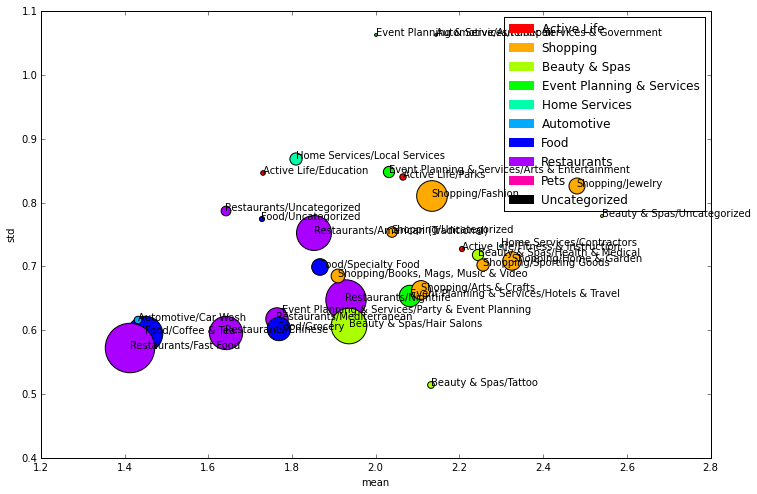

In [132]:
data = ['mean', 'std']

for cat, values in sub_price_analysis.items():
    #if cat.find('Shopping'): 
    #    continue
    if values['count'] < 20:
        continue
    plt.scatter(values[data[0]], values[data[1]], c=get_color(values['super_cat']), s=values['count']/3)
    plt.text(values[data[0]], values[data[1]], cat)
    
legend = []
for cat, value in names.items():
    legend.append(mpatches.Patch(color=get_color(cat), label=value['name']))
plt.legend(handles=legend)
plt.xlabel(data[0])
plt.ylabel(data[1])
plt.show()

In [121]:
df_detailed_price_analysis = pd.DataFrame(sub_price_analysis).transpose()
df_detailed_price_analysis.sort('mean', ascending=False)[:10]

,count,mean,median,std,sub_cat,super_cat,var
Home Services/Uncategorized,3,3.333333,4.0,1.154701,-1,4,1.333333
Home Services/Professional Services,15,2.666667,3.0,1.175139,1,4,1.380952
Pets/Veterinarians,6,2.666667,2.5,0.816497,1,8,0.666667
Beauty & Spas/Uncategorized,24,2.541667,3.0,0.779028,-1,2,0.606884
Home Services/Printing Services,2,2.500000,2.5,0.707107,4,4,0.500000
Shopping/Jewelry,768,2.480469,2.0,0.826317,2,1,0.682799
Shopping/Home & Garden,1030,2.326214,2.0,0.708406,4,1,0.501839
Home Services/Contractors,20,2.300000,2.0,0.732695,0,4,0.536842
Event Planning & Services/Transportation,14,2.285714,2.0,1.069045,2,3,1.142857
Shopping/Sporting Goods,452,2.256637,2.0,0.701961,3,1,0.492750


In [122]:
df_detailed_price_analysis.sort('var')[:10]

,count,mean,median,std,sub_cat,super_cat,var
Automotive/Motorcycle Repair,10,2.200000,2,0.421637,1,5,0.177778
Beauty & Spas/Dentists,4,2.250000,2,0.500000,1,2,0.250000
Beauty & Spas/Tattoo,136,2.132353,2,0.513648,3,2,0.263834
Restaurants/Fast Food,7341,1.413976,1,0.572404,4,7,0.327647
Food/Coffee & Tea,3782,1.449762,1,0.594864,0,6,0.353863
Restaurants/Chinese,3331,1.643050,2,0.596432,2,7,0.355732
Food/Grocery,1643,1.769324,2,0.602256,1,6,0.362713
Beauty & Spas/Hair Salons,3806,1.935102,2,0.605921,2,2,0.367141
Automotive/Car Wash,167,1.431138,1,0.615845,2,5,0.379266
Restaurants/Mediterranean,1512,1.763228,2,0.617008,3,7,0.380699


In [ ]:
god = ['Synagogues']

 businesses.apply